In [ ]:
!nvidia-smi

Sun May 15 22:12:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
#Preprocessing Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator;
#Model imports
from tensorflow.keras.applications import ResNet50,VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential;
import pandas as pd;
import numpy as np;
from tqdm import tqdm
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Downloading Data
German, Persian and Combined
Just run the section all at oncem we are only downloading the data and merging 
the common classes between two different classes.

In [2]:
#Upload the kaggle json generated from kaggle site
!pip install kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
#German Dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/


 97% 592M/612M [00:02<00:00, 261MB/s]
100% 612M/612M [00:02<00:00, 230MB/s]


In [4]:
!mkdir German

In [5]:
%%capture
!unzip gtsrb-german-traffic-sign -d German

In [6]:
#Persian Dataset
!kaggle datasets download -d saraparsaseresht/persian-traffic-sign-dataset-ptsd --force

 98% 533M/544M [00:03<00:00, 135MB/s]
100% 544M/544M [00:03<00:00, 163MB/s]


In [7]:
!mkdir Persian

In [8]:
%%capture
!unzip persian-traffic-sign-dataset-ptsd -d Persian

In [9]:
# Data combining for German und Persian 
import shutil
import os
#!mkdir Combined

ger_map = [1, 2, 3, 4, 5, 10, 13, 14, 17, 18, 22, 25, 27, 28, 29, 33, 34, 35, 38, 39, 40]
for fol in range(len(ger_map)):
  source_dir = f'/content/German/Train/{ger_map[fol]}'
  destination_dir = f'/content/Combined/{fol}'
  shutil.copytree(source_dir, destination_dir)

In [10]:
german_cominedlength = len(os.listdir('/content/Combined/1'))
print("Length of data before merging ",german_cominedlength)

Length of data before merging  2250


In [11]:
import os
# new_values =  {
#     1 :'10_Maximum Speed 30',
#     2:'12_Maximum Speed 50',
#     3:'13_Maximum Speed 60',
#     4:'14_Maximum Speed 70',
#     5:'15_Maximum Speed 80',
#     10:'38_Truck Prohibited',
#     13:'5_Give Way',
#     14:'37_STOP',
#     17:'18_No Entry',
#     18:'4_Danger',
#     22:'6_Hump',
#     25:'30_Road Work',
#     27:'26_Pedestrian crossing',
#     28:'33_School Crossing',
#     29:'3_Cycle crossing',
#     33:'27_Right Bend',
#     34:'7_Left Bend',
#     35:'22_One way Traffic',
#     38:'2_Compulsory Keep Right',
#     39:'1_Compulsory Keep Left',
#     40:'31_Roundabouts' 
#     }


# for key,value in new_values.items():
#   source_dir = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{value}';
#   for files in os.listdir(source_dir):
#     source = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{value}/{files}';
#     destination_dir =  f'/content/Combined/{key}';
#     shutil.copy(source,destination_dir);

per_map = ['10_Maximum Speed 30', '12_Maximum Speed 50', '13_Maximum Speed 60', '14_Maximum Speed 70', '15_Maximum Speed 80', '38_Truck Prohibited', '5_Give Way', '37_STOP', '18_No Entry', '4_Danger', '6_Hump', '30_Road Work', '26_Pedestrian crossing', '33_School Crossing', '3_Cycle crossing', '27_Right Bend', '7_Left Bend', '22_One way Traffic', '2_Compulsory Keep Right', '1_Compulsory Keep Left', '31_Roundabouts']

for fol in range(len(per_map)):
  source_dir = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{per_map[fol]}';
  for files in os.listdir(source_dir):
    source = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{per_map[fol]}/{files}';
    destination_dir =  f'/content/Combined/{fol}';
    shutil.copy(source,destination_dir);
    

In [ ]:
german_cominedlength = len(os.listdir('/content/Combined/1'))
print("Length of data after merging ",german_cominedlength)

Length of data after merging  2500


# Generating CSV ; Persian and Combined

In [12]:
#For generating the persian csv with class id 
def generate_PersianCSV():
  #Only for Persian Dataset
  df = pd.read_csv('/content/Persian/testset_CSV.csv',sep='\t')
  df = df["file,species"].str.split(',', 1,expand = True)
  df.columns=['path','class']
  #As you see only class names are mentioned in the csv, and we need classId ?
  #Keys for Persian Dataset:

  check_dict = {            
              0:'Compulsory Keep BothSide',
              1:'Compulsory Keep Left', 
              2:'Compulsory Keep Right', 
              3:'Cycle crossing', 
              4:'Danger', 
              5:'Give Way', 
              6:'Hump', 
              7:'Left Bend', 
              8:'Left Margin', 
              9:'Left Turn Prohibited', 
              10:'Maximum Speed 30', 
              11:'Maximum Speed 40', 
              12:'Maximum Speed 50', 
              13:'Maximum Speed 60', 
              14:'Maximum Speed 70', 
              15:'Maximum Speed 80', 
              16:'Maximum Speed 90', 
              17:'MotorCycle Prohibited', 
              18:'No Entry', 
              19:'No Horn', 
              20:'NO Stopping', 
              21:'NO Waiting', 
              22:'One way Traffic', 
              23:'Park', 
              24:'Park Forbidden', 
              25:'Pedestrain', 
              26:'Pedestrian crossing', 
              27:'Right Bend', 
              28:'Right Margin', 
              29:'Right Turn Prohibited', 
              30:'Road Work',
              31:'Roundabouts', 
              32:'School', 
              33:'School Crossing', 
              34:'Side Road Right', 
              35:'Slow', 
              36:'Speed Camera', 
              37:'STOP', 
              38:'Truck Prohibited', 
              39:'Two Way Traffic', 
              40:'U-Turn', 
              41:'U-Turn Allowed', 
              42:'U-turn Prohibited'
              }

  for idx,val in enumerate(df['class']):
    for key,dictval in check_dict.items():
      if dictval == val:
        df.loc[idx,'classid'] = key;

  for idx,val in enumerate(df['path']):
    df.loc[idx,'path'] = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/test/PTSD_{val}'

  df = df.dropna()# Removing classId with NAN
  len(df.classid.unique())
  df.to_csv(r'PersianTest.csv', index = False)
  print(df.columns)
  display(df)
  return df
  

In [13]:
first_class = os.listdir('/content/Combined/5');
print(len(first_class))

2156


# Look at Number of Images per class


In [14]:
#Data analysis: 
#Data analysis: 
# Before Oversampling
import os
combined_dictionary = {};
path = os.listdir('/content/Combined/');
base_path = '/content/Combined/';

for folder in path:
  key = str(folder)
  folder_path = os.path.join(base_path,folder);
  combined_dictionary[key] = (len(os.listdir(folder_path)))

combined_dictionary

{'0': 2697,
 '1': 2500,
 '10': 693,
 '11': 1639,
 '12': 537,
 '13': 874,
 '14': 932,
 '15': 779,
 '16': 531,
 '17': 1884,
 '18': 2773,
 '19': 669,
 '2': 1698,
 '20': 857,
 '3': 2022,
 '4': 1936,
 '5': 2156,
 '6': 2544,
 '7': 1109,
 '8': 2040,
 '9': 1599}

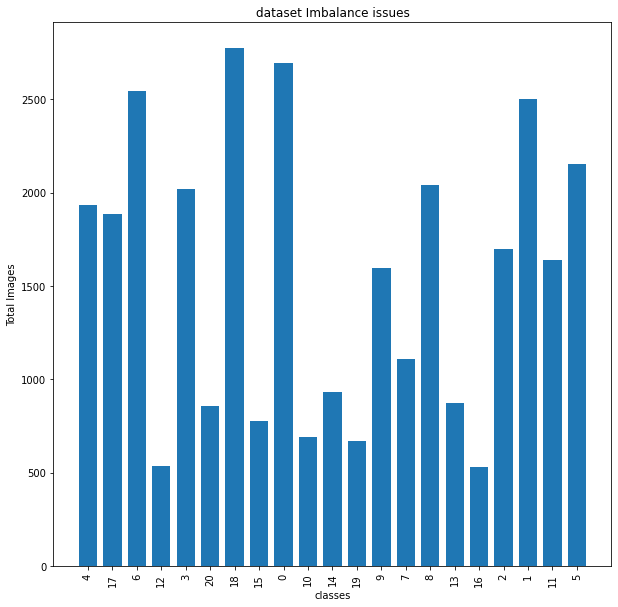

In [15]:
#Dataimbalance issues plotted 
import matplotlib.pyplot as plt
# Bar chart with day against tip
plt.figure(figsize=(10,10))
plt.bar(combined_dictionary.keys(), combined_dictionary.values(),width=0.75)
ticks = range(0,len(combined_dictionary.keys()));
labels = combined_dictionary.keys();
plt.xticks(ticks, labels,rotation=90)
plt.title("dataset Imbalance issues")
  
# Setting the X and Y labels
plt.xlabel('classes')
plt.ylabel('Total Images')

# Adding the legends
plt.show()

In [ ]:
#Dont Run Oversampling and UnderSampling Section 

#Dont Run Oversampling and UnderSampling Section below

# OverSampling the data. for the Combined Dataset 

In [ ]:
# The dataset is highly imbalanced for the combined dataset, picking the files which has less than 1000;
new_folderList = []
for key in combined_dictionary:
  if combined_dictionary.get(key) <= 1000:
    new_folderList.append(int(key))
  else:
    pass;
  
print(new_folderList)
#After than we can make use of this 
target_path = '/content/Oversampling/'
base_path = '/content/Combined/';

[10, 16, 14, 12, 20, 13, 15, 19]


In [ ]:
for fol in range(len(new_folderList)):
  source_dir = f'/content/Combined/{new_folderList[fol]}'
  destination_dir = f'/content/Oversampled/{new_folderList[fol]}'
  shutil.copytree(source_dir, destination_dir)   

In [ ]:
import os
directories = os.listdir('/content/Oversampled');
print(directories)
for fols in directories:
    files = os.listdir(f'/content/Oversampled/{fols}')
    for count, old_name in enumerate(files):
        old_filepath = f'/content/Oversampled/{fols}/{old_name}';
        f_name, f_ext = os.path.splitext(old_name)
        f_name = old_name + str(count)
        new_name = f'{f_name}{f_ext}'
        new_filepath = f'/content/Oversampled/{fols}/{new_name}'
        os.rename(old_filepath, new_filepath)

['10', '16', '14', '12', '20', '13', '15', '19']


In [ ]:
for fol in range(len(new_folderList)):
  source_dir = f'/content/Oversampled/{new_folderList[fol]}';
  for files in os.listdir(source_dir):
    source = f'/content/Oversampled/{new_folderList[fol]}/{files}';
    destination_dir =  f'/content/Combined/{new_folderList[fol]}';
    shutil.copy(source, destination_dir)


In [ ]:
for folder in path:
  key = str(folder)
  folder_path = os.path.join('/content/Combined',folder);
  combined_dictionary[key] = (len(os.listdir(folder_path)))

combined_dictionary

{'6': 2544,
 '11': 1639,
 '17': 1884,
 '0': 2697,
 '10': 1386,
 '16': 1062,
 '14': 1864,
 '3': 2022,
 '1': 2500,
 '12': 1074,
 '5': 2156,
 '20': 1714,
 '7': 1109,
 '18': 2773,
 '13': 1748,
 '2': 1698,
 '15': 1558,
 '9': 1599,
 '19': 1338,
 '8': 2040,
 '4': 1936}

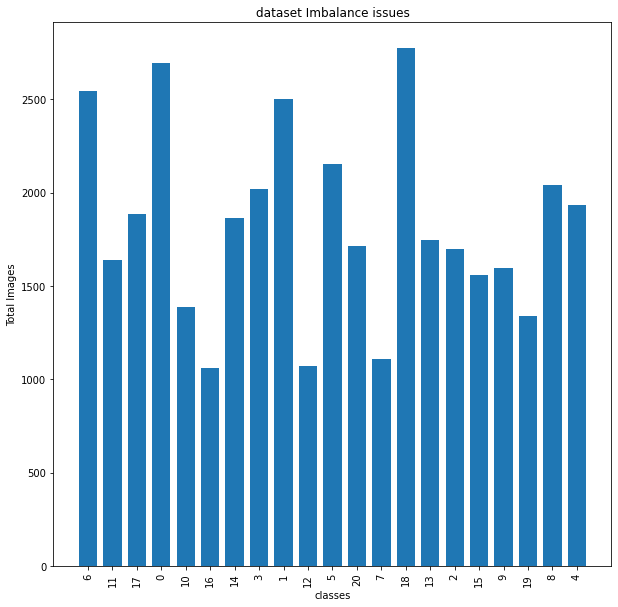

In [ ]:
import matplotlib.pyplot as plt
# Bar chart with day against tip
plt.figure(figsize=(10,10))
plt.bar(combined_dictionary.keys(), combined_dictionary.values(),width=0.75)
ticks = range(0,len(combined_dictionary.keys()));
labels = combined_dictionary.keys();
plt.xticks(ticks, labels,rotation=90)
plt.title("dataset Imbalance issues")
  
# Setting the X and Y labels
plt.xlabel('classes')
plt.ylabel('Total Images')

# Adding the legends
plt.show()

# underSampling

In [ ]:
pruned_list = []
for key, value in combined_dictionary.items():
  if combined_dictionary[key] > 1000:
    pruned_list.append(key);
print(pruned_list)

['6', '11', '17', '0', '10', '16', '14', '3', '1', '12', '5', '20', '7', '18', '13', '2', '15', '9', '19', '8', '4']


In [ ]:
from random import sample;
for fileindex in pruned_list:
  files = os.listdir(f'/content/Combined/{fileindex}');
  max_files = len(files) - 1000
  if max_files > 0:
    for pruned in sample(files,max_files):
      os.remove(f'/content/Combined/{fileindex}/{pruned}');
  else:
    pass

In [ ]:
import os
combined_dictionary = {};
path = os.listdir('/content/Combined/');
base_path = '/content/Combined/';

for folder in path:
  key = str(folder)
  folder_path = os.path.join(base_path,folder);
  combined_dictionary[key] = (len(os.listdir(folder_path)))

combined_dictionary

{'6': 1000,
 '11': 1000,
 '17': 1000,
 '0': 1000,
 '10': 1000,
 '16': 1000,
 '14': 1000,
 '3': 1000,
 '1': 1000,
 '12': 1000,
 '5': 1000,
 '20': 1000,
 '7': 1000,
 '18': 1000,
 '13': 1000,
 '2': 1000,
 '15': 1000,
 '9': 1000,
 '19': 1000,
 '8': 1000,
 '4': 1000}

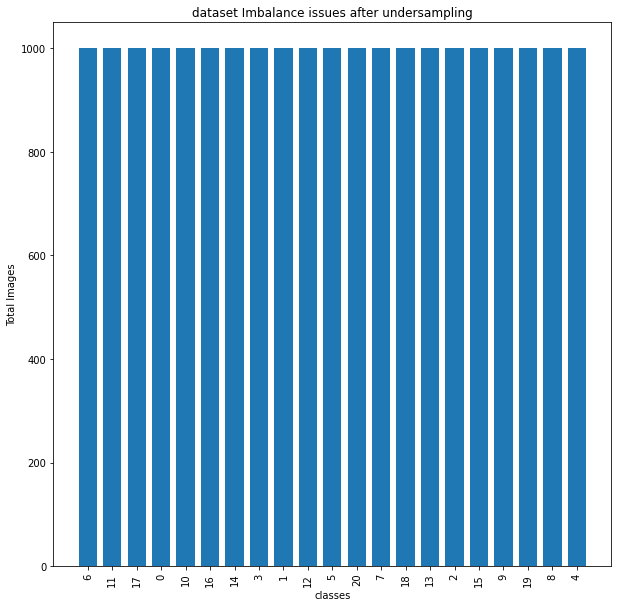

In [ ]:
#Dataimbalance issues plotted 
import matplotlib.pyplot as plt
# Bar chart with day against tip
plt.figure(figsize=(10,10))
plt.bar(combined_dictionary.keys(), combined_dictionary.values(),width=0.75)
ticks = range(0,len(combined_dictionary.keys()));
labels = combined_dictionary.keys();
plt.xticks(ticks, labels,rotation=90)
plt.title("dataset Imbalance issues after undersampling")
  
# Setting the X and Y labels
plt.xlabel('classes')
plt.ylabel('Total Images')

# Adding the legends
plt.show()

# Data Preprocessing
Change DataSetPath for German or Persian


# **Test Dataset**

In [ ]:
shutil.rmtree('/content/Combined_Test', ignore_errors=False, onerror=None)

FileNotFoundError: ignored

In [16]:
import pandas as pd
German_Test = pd.read_csv('German/Test.csv')
ger_test_final = pd.DataFrame(columns=["Path", "ClassId"])
German_Test = German_Test[["Path", "ClassId"]]
ger_map = [1, 2, 3, 4, 5, 10, 13, 14, 17, 18, 22, 25, 27, 28, 29, 33, 34, 35, 38, 39, 40]
for i in range(len(ger_map)):
  cur = German_Test.loc[German_Test['ClassId'] == ger_map[i]]
  cur.ClassId = i
  ger_test_final = ger_test_final.append(cur)
Persian_Test = pd.read_csv('Persian/testset_CSV.csv', error_bad_lines=False)
Persian_Test.columns = ["Path", "ClassId"]
per_test_final = pd.DataFrame(columns=["Path", "ClassId"])
per_test_map = ['Maximum Speed 30', 'Maximum Speed 50', 'Maximum Speed 60', 'Maximum Speed 70', 'Maximum Speed 80', 'Truck Prohibited', 'Give Way', 'STOP', 'No Entry', 'Danger', 'Hump', 'Road Work', 'Pedestrian crossing', 'School Crossing', 'Cycle crossing', 'Right Bend', 'Left Bend', 'One way Traffic', 'Compulsory Keep Right', 'Compulsory Keep Left', 'Roundabouts']
for i in range(len(per_test_map)):
  cur = Persian_Test.loc[Persian_Test['ClassId'] == per_test_map[i]]
  cur.ClassId = i
  per_test_final = per_test_final.append(cur)
per_test_final.to_csv('per_test_final.csv')
ger_test_final.to_csv('ger_test_final.csv')

import shutil
combined_test_final = pd.DataFrame(columns=["Path", "ClassId"])
!mkdir Combined_Test
num = 0
for _, row in per_test_final.iterrows():
  source = "/content/Persian/PTSD_Recognition/PTSD_Recognition/test/PTSD_"+row["Path"].lower()
  destination =  '/content/Combined_Test/'+str(num) +'.jpg'
  shutil.copy(source,destination)
  combined_test_final.loc[combined_test_final.shape[0]] = [str(num), row["ClassId"]]
  num+=1
for _, row in ger_test_final.iterrows():
  source = '/content/German/'+row["Path"].lower()
  destination =  f'/content/Combined_Test/'+str(num) +'.jpg'
  shutil.copy(source,destination)
  combined_test_final.loc[combined_test_final.shape[0]] = [str(num), row["ClassId"]]
  num+=1
combined_test_final.to_csv('combined_test_final.csv')


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 818: expected 2 fields, saw 3\nSkipping line 820: expected 2 fields, saw 3\n'


In [17]:
#test_df = pd.read_csv('/content/combined_test_final.csv')
for idx,val in enumerate(combined_test_final['Path']):
    combined_test_final.loc[idx,'filepath'] = f'/content/Combined_Test/{val}.jpg'


In [ ]:
combined_test_final.columns
#test_df.rename(columns = {'filepath':'path'}, inplace = True)

Index(['Path', 'ClassId', 'filepath'], dtype='object')

In [18]:
combined_test_final.ClassId.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20], dtype=object)

In [19]:
combined_test_final.to_csv('testing.csv')

In [ ]:
combined_test_final.head(5)

,Path,ClassId,filepath
0,0,0,/content/Combined_Test/0.jpg
1,1,0,/content/Combined_Test/1.jpg
2,2,0,/content/Combined_Test/2.jpg
3,3,0,/content/Combined_Test/3.jpg
4,4,0,/content/Combined_Test/4.jpg


In [20]:
#Data Augmentation

BATCH_SIZE = 256; 

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    #width_shift_range=0.2,
                    #brightness_range=[0.3,1.0],
                    #zoom_range=0.2,
                    #shear_range=0.2,
                    #height_shift_range=0.2,
                    horizontal_flip=False,
                    validation_split=0.2);
valid_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2);
test_datagen  = ImageDataGenerator(rescale=1./255);

training_dataset = 'COMBINED' # Use GERMAN OR PERSIAN OR COMBINED

if training_dataset == 'GERMAN':
    
    print('You are testing with German Dataset')
    train_path ='/content/German/Train';
    test_path= '/content/German/Test';
    test_df = pd.read_csv('/content/German/Test.csv',dtype="string");
    for idx,val in enumerate(test_df['Path']):
        test_df.loc[idx,'Path'] = f'/content/German/{val}'

elif training_dataset == 'PERSIAN':
    print('You are testing with Persian Dataset')
    train_path ='/content/Persian/PTSD_Recognition/PTSD_Recognition/train';
    test_path = '/content/Persian/PTSD_Recognition/PTSD_Recognition/test'
    test_df = generate_PersianCSV();

else:
    print('You are using  Combined Dataset')
    print("Testing dataset")
    train_path ='/content/Combined';
    test_path = '/content/Merged_Testfolders';
    test_df = combined_test_final;
    test_df.columns= test_df.columns.str.strip().str.lower()
    test_df['classid']=test_df['classid'].astype(str)
    test_ds=test_datagen.flow_from_dataframe( test_df, x_col='filepath', y_col='classid', target_size=(224,224),batch_size=BATCH_SIZE)

print("training dataset")
train_ds = train_datagen.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             subset='training',
                                             class_mode='categorical');
                                             
print("validation dataset")
valid_ds = valid_datagen.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             batch_size=BATCH_SIZE,
                                             color_mode='rgb',
                                             subset='validation',
                                             class_mode='categorical',
                                             shuffle=False);                                       
                                           

if training_dataset  != 'COMBINED':
    
    test_df.columns= test_df.columns.str.strip().str.lower()
    test_df['classid']=test_df['classid'].astype(str)
    test_ds=test_datagen.flow_from_dataframe(test_df, x_col='path', y_col='classid',
                                             target_size=(224,224), 
                                             class_mode=None,color_mode='rgb', 
                                             shuffle=False, batch_size=BATCH_SIZE)  

You are using  Combined Dataset
Testing dataset
Found 9506 validated image filenames belonging to 21 classes.
training dataset
Found 25986 images belonging to 21 classes.
validation dataset
Found 6483 images belonging to 21 classes.


In [21]:
train_classList = list(train_ds.class_indices.keys());
valid_classList = list(valid_ds.class_indices.keys());
print(train_classList);
print(len(train_classList));

print(list(test_ds.class_indices.keys()))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']
21
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
test_ds.class_indices.keys()

dict_keys(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9'])

In [22]:
batch_size = 256
X_iter, Y_iter = next(valid_ds)
X_valid = X_iter;
Y_valid = Y_iter;
for i in tqdm(range(int(valid_ds.n/batch_size))): 
    img, label = next(valid_ds)
    X_valid = np.append(X_valid , img, axis=0 )
    Y_valid = np.append(Y_valid, label, axis=0)

100%|██████████| 25/25 [00:37<00:00,  1.50s/it]


In [23]:
def truthPrediction(model,X_valid):
    preds=model.predict(X_valid);
    y_pred = np.argmax(preds,axis=1)
    y_truth = np.argmax(Y_valid,axis=1);
    print(y_truth.shape)
    print(Y_valid.shape)
    return (y_truth,y_pred)

In [ ]:
print(X_valid.shape, Y_valid.shape)

(6483, 49, 49, 3) (6483, 21)


In [ ]:
combined_test_final.head(2)

,path,classid,filepath
0,0,0,/dli/task/Combined_Test/0.jpg
1,1,0,/dli/task/Combined_Test/1.jpg


# VGG 19Model Transfer Training


In [24]:
NUM_CLASS = len(test_ds.class_indices.keys())
print(NUM_CLASS)

21


In [26]:
#Reference Paper: https://arxiv.org/pdf/1409.1556v6.pdf

#Using Tensorflor 2.6 in NVIDIA, HeNormal is not supported
from tensorflow.keras.models import Model;

from tensorflow.keras.initializers import HeNormal;

base_model = VGG19(include_top = False,weights='imagenet',input_shape=(224,224,3));
x = base_model.output;
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x);
x = BatchNormalization()(x)
x = Dense(128,activation='relu', kernel_initializer=HeNormal())(x);
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(128,activation='relu', kernel_initializer=HeNormal())(x);
x = BatchNormalization()(x);
#x = Dropout(0.50)(x)
x = Dense(128,activation='relu', kernel_initializer=HeNormal())(x);
x = BatchNormalization()(x);
#x = Dropout(0.50)(x)
predictions = Dense(NUM_CLASS,activation='softmax')(x);
vgg_model = Model(inputs=base_model.inputs,outputs=predictions);

vgg_model.summary();
print(f'Total number of layers : {len(vgg_model.layers)}')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_model.layers[20:]

In [27]:
#Freezing Layers:
'''
for layer in model.layers[:20]:
   layer.trainable = False
for layer in model.layers[20:]:
   layer.trainable = True
   
'''
for layer in base_model.layers:
    layer.trainable = False
 

In [28]:
from tensorflow.keras.optimizers import SGD,Adam;
from tensorflow.keras.callbacks import EarlyStopping;

train_steps = int(train_ds.n/BATCH_SIZE) # train_samples / batch size
valid_steps = int(valid_ds.n/BATCH_SIZE) # valid_samples / batch_size
vgg_model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),
              metrics=['accuracy']);
es = EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)
vgg_model.fit(train_ds,
          steps_per_epoch=train_steps,
          epochs=30,
          verbose=1,
          validation_data=valid_ds,
          validation_steps=valid_steps,
          callbacks=[es])


Epoch 1/30
101/101 [==============================] - 267s 2s/step - loss: 1.7640 - accuracy: 0.4646 - val_loss: 2.5052 - val_accuracy: 0.2133
Epoch 2/30
101/101 [==============================] - 187s 2s/step - loss: 1.0170 - accuracy: 0.6761 - val_loss: 1.9793 - val_accuracy: 0.3439
Epoch 3/30
101/101 [==============================] - 189s 2s/step - loss: 0.7943 - accuracy: 0.7453 - val_loss: 1.7645 - val_accuracy: 0.4339
Epoch 4/30
101/101 [==============================] - 190s 2s/step - loss: 0.6579 - accuracy: 0.7861 - val_loss: 1.5342 - val_accuracy: 0.5306
Epoch 5/30
101/101 [==============================] - 190s 2s/step - loss: 0.5796 - accuracy: 0.8106 - val_loss: 1.4714 - val_accuracy: 0.5673
Epoch 6/30
101/101 [==============================] - 190s 2s/step - loss: 0.5189 - accuracy: 0.8295 - val_loss: 1.4212 - val_accuracy: 0.6062
Epoch 7/30
101/101 [==============================] - 190s 2s/step - loss: 0.4669 - accuracy: 0.8454 - val_loss: 1.4702 - val_accuracy: 0.6152

In [ ]:
#Save the model,
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
vgg_model.save_weights("vgg19_model.h5")
print("Saved model to disk")

In [ ]:
#After ram exceeded load the weights 
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("vgg19_model.h5")
print("Loaded model from disk")

In [29]:
evaluation = vgg_model.evaluate(test_ds)
print(evaluation)

38/38 [==============================] - 55s 1s/step - loss: 1.1247 - accuracy: 0.6909
[1.124682903289795, 0.690932035446167]


In [ ]:
print(X_valid.shape, Y_valid.shape)

(4200, 224, 224, 3) (4200, 21)


In [30]:
model = vgg_model
output = truthPrediction(model,X_valid)

(6483,)
(6483, 21)


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


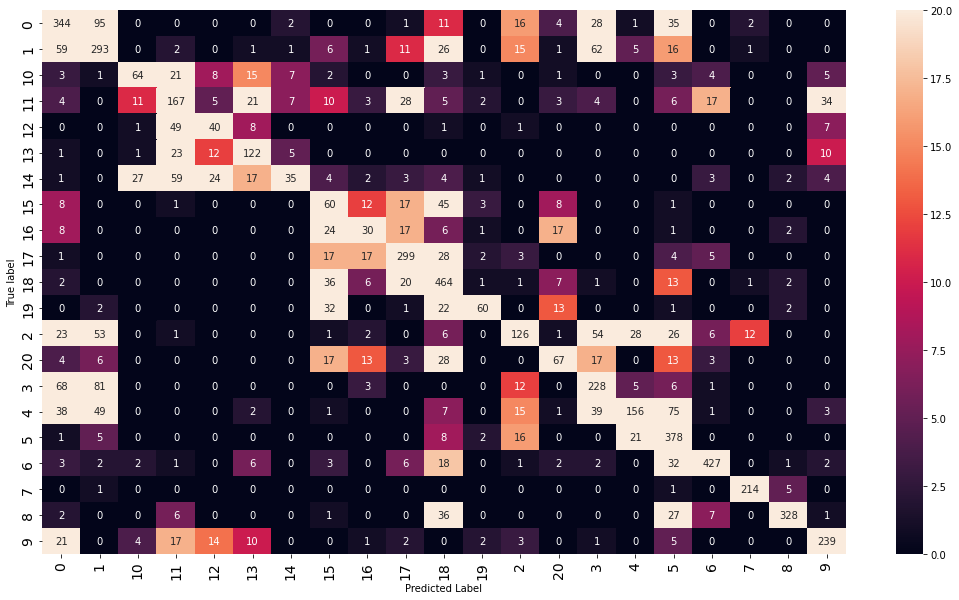

In [31]:
import seaborn as sns
conf = confusion_matrix(output[0], output[1])
plt.figure(figsize=(18,10))
ax = sns.heatmap(conf, annot=True, fmt="d", vmax=20)
ax.set(xlabel='Predicted Label',
       ylabel='True label');
ax.xaxis.set_ticklabels(train_classList)
ax.yaxis.set_ticklabels(train_classList)
plt.xticks(fontsize=14, fontname='Times New Roman',rotation=90)
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.show()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(output[0], output[1]))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       539
           1       0.50      0.59      0.54       500
           2       0.58      0.46      0.52       138
           3       0.48      0.51      0.50       327
           4       0.39      0.37      0.38       107
           5       0.60      0.70      0.65       174
           6       0.61      0.19      0.29       186
           7       0.28      0.39      0.33       155
           8       0.33      0.28      0.31       106
           9       0.73      0.80      0.76       376
          10       0.65      0.84      0.73       554
          11       0.80      0.45      0.58       133
          12       0.60      0.37      0.46       339
          13       0.54      0.39      0.45       171
          14       0.52      0.56      0.54       404
          15       0.72      0.40      0.52       387
          16       0.59      0.88      0.70       431
          17       0.90    

In [37]:
print(per_test_map[11])

Road Work


# ResNet50 Model Training


In [ ]:
# Overfitting -> tried with Dropout,batch normalization, L1 L2 
#Resnet_Model:https://arxiv.org/pdf/1512.03385.pdf

from tensorflow.keras.models import Model;
from tensorflow.keras.initializers import HeNormal;
from tensorflow.keras import regularizers
base_model = ResNet50(include_top = False,weights='imagenet',input_shape=(224,224,3));
x = base_model.output;
x = GlobalAveragePooling2D()(x);
x = BatchNormalization()(x)
x = Dense(128,activation='relu',
          kernel_initializer=HeNormal()
         # kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)
         )(x);
x = BatchNormalization()(x)
x = Dropout(0.40)(x)
x = Dense(128,activation='relu',
          kernel_initializer=HeNormal(),
          #kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)
          )(x);

x = BatchNormalization()(x)
x = Dense(128,activation='relu',
          kernel_initializer=HeNormal(),
          #kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)
          )(x);
x = BatchNormalization()(x)
predictions = Dense(NUM_CLASS,activation='softmax')(x);
resnet_model = Model(inputs=base_model.inputs,outputs=predictions);
resnet_model.summary();
print(len(resnet_model.layers))


In [ ]:
for layer in base_model.layers:
  layer.trainable = False;

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam;
from tensorflow.keras.callbacks import EarlyStopping;

resnet_model.compile(loss="categorical_crossentropy",optimizer=Adam( learning_rate=0.002,beta_1=0.9,beta_2=0.999),metrics=['accuracy']);
es = EarlyStopping(monitor="val_accuracy",patience=15,restore_best_weights=True)
resnet_model.fit(train_ds,
         steps_per_epoch=train_steps,
          epochs=150,
          verbose=1,
          validation_data=valid_ds,
          validation_steps=val_steps,
          callbacks=[es])


In [ ]:
#In case of ram is excausted 
from tensorflow.keras.models import model_from_json
model_json = resnet_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
resnet_model.save_weights("resnet_model.h5")
print("Saved model to disk")

Saved model to disk
Loaded model from disk


In [ ]:
#After ram exceeded load the weights 
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("resnet_model.h5")
print("Loaded model from disk")

In [ ]:
evaluation = vgg_model.evaluate(test_ds)
print(evaluation)

In [ ]:
print(X_valid.shape, Y_valid.shape)

In [ ]:
model = loaded_model # if in case the ram exceeds 
output = truthPrediction(model,X_valid)

In [ ]:
import seaborn as sns
conf = confusion_matrix(output[0], output[1])
plt.figure(figsize=(18,10))
ax = sns.heatmap(conf, annot=True, fmt="d", vmax=20)
ax.set(xlabel='Predicted Label',
       ylabel='True label');
ax.xaxis.set_ticklabels(train_classList)
ax.yaxis.set_ticklabels(train_classList)
plt.xticks(fontsize=14, fontname='Times New Roman',rotation=90)
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(output[0], output[1]))

# Without Pretraining


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
NUM_CLASS = len(test_ds.class_indices.keys())

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation = 'relu', 
                     input_shape = (49, 49, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', 
                     activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', 
                     activation = 'relu'))
model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', 
                     activation = 'relu'))
model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', 
                     activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))   
model.add(Dense(NUM_CLASS))
model.add(Activation("softmax"))

In [ ]:
model.summary();

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 49, 49, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)       

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam;
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),
              metrics=['accuracy']);

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping;
es = EarlyStopping(monitor='val_accuracy',patience=15,restore_best_weights=True)

train_steps = int(train_ds.n/BATCH_SIZE) # train_samples / batch size
valid_steps = int(valid_ds.n/BATCH_SIZE) # valid_samples / batch_size
model.fit(train_ds,
         steps_per_epoch=train_steps,
          epochs=1000,
          verbose=1,
          validation_data=valid_ds,
          validation_steps=valid_steps,
          callbacks=[es])

Epoch 1/1000
101/101 [==============================] - 33s 315ms/step - loss: 1.5437 - accuracy: 0.5310 - val_loss: 0.7897 - val_accuracy: 0.7706
Epoch 2/1000
101/101 [==============================] - 32s 319ms/step - loss: 0.3078 - accuracy: 0.9068 - val_loss: 0.4562 - val_accuracy: 0.8739
Epoch 3/1000
101/101 [==============================] - 32s 315ms/step - loss: 0.1233 - accuracy: 0.9653 - val_loss: 0.3998 - val_accuracy: 0.8963
Epoch 4/1000
101/101 [==============================] - 34s 333ms/step - loss: 0.0676 - accuracy: 0.9812 - val_loss: 0.4122 - val_accuracy: 0.8927
Epoch 5/1000
101/101 [==============================] - 32s 316ms/step - loss: 0.0532 - accuracy: 0.9841 - val_loss: 0.3946 - val_accuracy: 0.9077
Epoch 6/1000
101/101 [==============================] - 31s 308ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.4399 - val_accuracy: 0.9114
Epoch 7/1000
101/101 [==============================] - 31s 308ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0

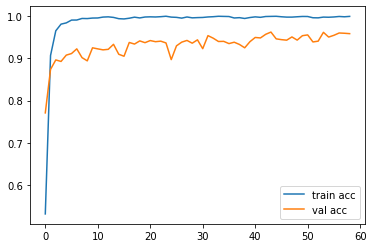

In [ ]:
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

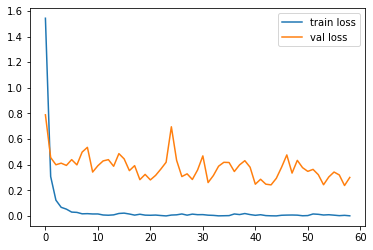

In [ ]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
evaluation = model.evaluate(test_ds)

38/38 [==============================] - 10s 268ms/step - loss: 0.2332 - accuracy: 0.9693


In [ ]:
model = model 
output = truthPrediction(model,X_valid)

(6483,)
(6483, 21)


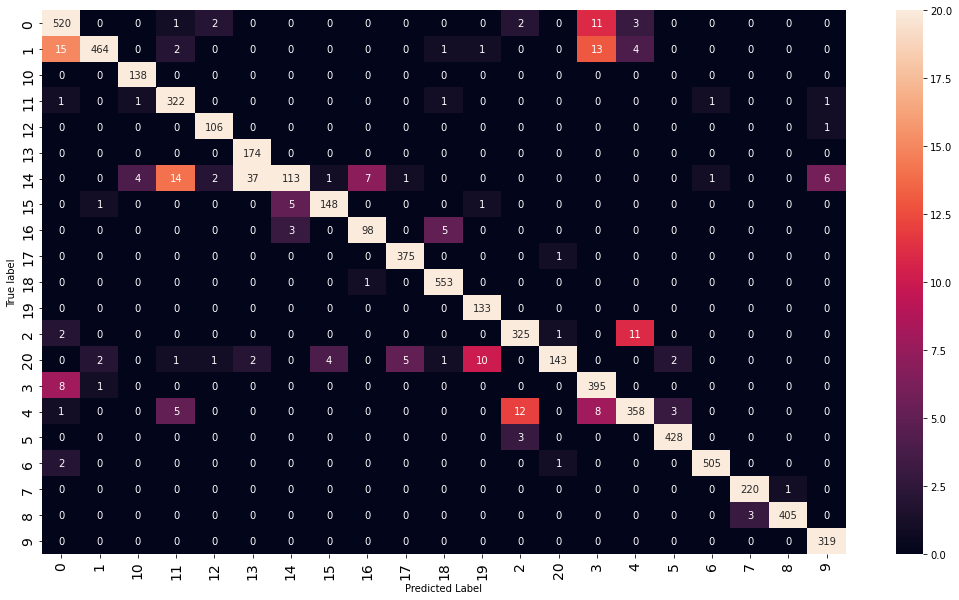

In [ ]:
import seaborn as sns
conf = confusion_matrix(output[0], output[1])
plt.figure(figsize=(18,10))
ax = sns.heatmap(conf, annot=True, fmt="d", vmax=20)
ax.set(xlabel='Predicted Label',
       ylabel='True label');
ax.xaxis.set_ticklabels(train_classList)
ax.yaxis.set_ticklabels(train_classList)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(output[0], output[1]))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       539
           1       0.99      0.93      0.96       500
           2       0.97      1.00      0.98       138
           3       0.93      0.98      0.96       327
           4       0.95      0.99      0.97       107
           5       0.82      1.00      0.90       174
           6       0.93      0.61      0.74       186
           7       0.97      0.95      0.96       155
           8       0.92      0.92      0.92       106
           9       0.98      1.00      0.99       376
          10       0.99      1.00      0.99       554
          11       0.92      1.00      0.96       133
          12       0.95      0.96      0.95       339
          13       0.98      0.84      0.90       171
          14       0.93      0.98      0.95       404
          15       0.95      0.93      0.94       387
          16       0.99      0.99      0.99       431
          17       1.00    

# Prediction of Class


In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
img_path = '/content/Combined_Test/125.jpg' 

img = image.load_img(img_path, target_size=(49, 49)) 
test = image.img_to_array(img)
print(test.shape)

(49, 49, 3)


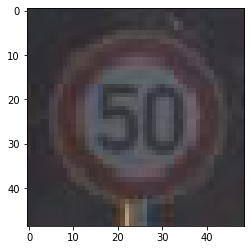

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test/255)

In [ ]:
test = np.expand_dims(test, 0) 
print(test.shape)
test = preprocess_input(test)

(1, 49, 49, 3)


In [ ]:
preds = model.predict(test)
print(np.round(preds,4))
print(train_classList)
print('Predicted class:', train_classList[np.argmax(preds)])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']
Predicted class: 11
